# Pregunta 2: Análisis de Opiniones sobre Películas

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL local. Determine cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas.

In [1]:
import urllib
import pandas as pd

train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")

rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])

train_df.shape

(3554, 2)

Hay 3554 elementos en el conjunto de entrenamiento.

In [2]:
test_df.shape

(3554, 2)

Hay 3554 elementos en el conjunto de pruebas

(b) Construya una función, denominada word extractor (se llamó stemmer_word_extractor), que devuelva una lista de las palabras contenidas en un determinado un trozo de texto. Incorpore en su función las operaciones de lower-casing y stemming. Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con los resultados obtenidos si no se hace stemming.

In [3]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def stemmer_word_extractor(text):
    stemmer = PorterStemmer()
    commonwords = stopwords.words('english')

    # Substitute multiple letter by two
    text = re.sub(r'([a-z])\1+', r'\1\1',text)

    words = ""

    wordtokens = [ stemmer.stem(word.lower()) \
                  for word in word_tokenize(text.decode('utf-8', 'ignore'))
                  if word.lower() not in commonwords ]

    words = " ".join(wordtokens)

    return words

def stemmer_word_extractor_nostopwords(text):
    stemmer = PorterStemmer()

    # Substitute multiple letter by two
    text = re.sub(r'([a-z])\1+', r'\1\1',text)

    words = ""

    wordtokens = [ stemmer.stem(word.lower()) \
                  for word in word_tokenize(text.decode('utf-8', 'ignore')) ]

    words = " ".join(wordtokens)

    return words

In [4]:
def word_extractor(text):
    stemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    

    # Substitute multiple letter by two
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    
    words = ""

    wordtokens = [ word.lower() \
                  for word in word_tokenize(text.decode('utf-8', 'ignore'))
                  if word.lower() not in commonwords ]

    words = " ".join(wordtokens)

    return words

def word_extractor_nostopwords(text):
    stemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    

    # Substitute multiple letter by two
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    
    words = ""

    wordtokens = [ word.lower() \
                  for word in word_tokenize(text.decode('utf-8', 'ignore')) ]

    words = " ".join(wordtokens)

    return words

In [5]:
sentences = ["I don't love eating cake",
             "I love eating cake",
             "I loved eating the cake",
             "I love to eat cake",
             "I love to eat cakes",
             "I do not love eating cake",
             "I don't drive a lot of cars"]

for sentence in sentences:
    print "Frase:", sentence
    print "Lista de palabras:", word_extractor(sentence)
    print "Lista de palabras con stemming:", stemmer_word_extractor(sentence)
    print

Frase: I don't love eating cake
Lista de palabras: n't love eating cake
Lista de palabras con stemming: n't love eat cake

Frase: I love eating cake
Lista de palabras: love eating cake
Lista de palabras con stemming: love eat cake

Frase: I loved eating the cake
Lista de palabras: loved eating cake
Lista de palabras con stemming: love eat cake

Frase: I love to eat cake
Lista de palabras: love eat cake
Lista de palabras con stemming: love eat cake

Frase: I love to eat cakes
Lista de palabras: love eat cakes
Lista de palabras con stemming: love eat cake

Frase: I do not love eating cake
Lista de palabras: love eating cake
Lista de palabras con stemming: love eat cake

Frase: I don't drive a lot of cars
Lista de palabras: n't drive lot cars
Lista de palabras con stemming: n't drive lot car



Con stemming las palabras pasan a estar en su forma "base" sin conjugar.

(c) Construya una función, denominada word_extractor2 (se llamó lemmatize_word_extractor), análoga a la función anterior, pero que lematice las palabras en vez de hacer stemming. Pruebe la función con las frases sugeridas en el código anterior y discuta las diferencias que observa.

In [6]:
def lemmatize_word_extractor(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')

    # Substitute multiple letter by two
    text = re.sub(r'([a-z])\1+', r'\1\1',text)

    words = ""
    
    wordtokens = [ wordlemmatizer.lemmatize(word.lower(), "v") \
                  for word in word_tokenize(text.decode('utf-8','ignore'))
                  if word.lower() not in commonwords ]

    words = " ".join(wordtokens)
 
    return words

In [7]:
def lemmatize_word_extractor_nostopwords(text):
    wordlemmatizer = WordNetLemmatizer()

    # Substitute multiple letter by two
    text = re.sub(r'([a-z])\1+', r'\1\1',text)

    words = ""
    
    wordtokens = [ wordlemmatizer.lemmatize(word.lower(), "v") \
                  for word in word_tokenize(text.decode('utf-8', 'ignore')) ]

    words = " ".join(wordtokens)

    return words

In [8]:
for sentence in sentences:
    print "Frase:", sentence
    print "Lista de palabras:", word_extractor(sentence)
    print "Lista de palabras con stemming:", stemmer_word_extractor(sentence)
    print "Lista de palabras con lematizer:", lemmatize_word_extractor(sentence)
    print 

Frase: I don't love eating cake
Lista de palabras: n't love eating cake
Lista de palabras con stemming: n't love eat cake
Lista de palabras con lematizer: n't love eat cake

Frase: I love eating cake
Lista de palabras: love eating cake
Lista de palabras con stemming: love eat cake
Lista de palabras con lematizer: love eat cake

Frase: I loved eating the cake
Lista de palabras: loved eating cake
Lista de palabras con stemming: love eat cake
Lista de palabras con lematizer: love eat cake

Frase: I love to eat cake
Lista de palabras: love eat cake
Lista de palabras con stemming: love eat cake
Lista de palabras con lematizer: love eat cake

Frase: I love to eat cakes
Lista de palabras: love eat cakes
Lista de palabras con stemming: love eat cake
Lista de palabras con lematizer: love eat cake

Frase: I do not love eating cake
Lista de palabras: love eating cake
Lista de palabras con stemming: love eat cake
Lista de palabras con lematizer: love eat cake

Frase: I don't drive a lot of cars
Li

Emtre otras diferencias que en este contexto no se puede observar, la lemanización maneja mejor los plurales como "cars" pero se observa que son muy similares.

(d) Utilizando la función CountVectorizer de la librerı́a sklearn y de acuerdo a las directrices mencionadas en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras más frecuentes en el conjunto de entrenamiento y pruebas.

In [9]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [lemmatize_word_extractor(text) for text in train_df.Text]
texts_test = [lemmatize_word_extractor(text) for text in test_df.Text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)

In [10]:
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))+list(np.array(features_test.sum(axis=0)).reshape(-1,))

import pandas as pd
df = pd.DataFrame([{"Count": count, "Tag": tag} for tag, count in zip(vocab, dist)])

df.sort_values("Count", ascending=False)[:20]

,Count,Tag
3029,573,film
5260,421,movie
4864,267,make
4686,254,like
5586,238,one
1277,163,character
7661,158,story
8126,146,time
2744,144,even
3437,140,good


In [11]:
extrator_funcs = [("lemmatize", lemmatize_word_extractor),
                  ("stemmer", stemmer_word_extractor),
                  ("normal", word_extractor),
                  ("lemmatize_nostopwords", lemmatize_word_extractor_nostopwords),
                  ("stemmer_nostopwords", stemmer_word_extractor_nostopwords),
                  ("normal_nostopwords", word_extractor_nostopwords)]

features_train = {}
features_test = {}

for name, extrator_func in extrator_funcs:
    texts_train = [extrator_func(text) for text in train_df.Text]
    texts_test = [extrator_func(text) for text in test_df.Text]

    vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
    vectorizer.fit(np.asarray(texts_train))

    features_train[name] = vectorizer.transform(texts_train)
    features_test[name] = vectorizer.transform(texts_test)

(e) Construya una función que evalúe el desempeño obtenido por un clasificador genérico en el conjunto de entrenamiento y en el conjunto de pruebas. Utilice y explique las métricas que calcula la función classification report de la librerı́a sklearn.

In [12]:
from sklearn.metrics import classification_report

global results

results = []

def score_the_model(model,x,y,xt,yt,text, extractor, C):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))
    results.append({"Name": text,
                    "Training Accuracy": acc_tr,
                    "Test Accuracy": acc_test,
                    "extractor": extractor,
                    "C": C})

In [13]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

logistic.fit(features_train["normal"], labels_train)

score_the_model(logistic, features_train["normal"], labels_train, features_test["normal"], labels_test, "Test Logistic Regression", "normal", None)

Training Accuracy Test Logistic Regression: 0.991840
Test Accuracy Test Logistic Regression: 0.721644
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.72      1803
          -       0.71      0.72      0.72      1751

avg / total       0.72      0.72      0.72      3554



Se observa, utilizando como ejemplo una regresión logistica, que las métricas definidas son:
- Training Accuracy Logistic Regression: La exactitud del modelo en el conjunto de entrenamiento.
- Test Accuracy Logistic Regression: La exactitud del modelo en el conjunto de pruebas.
- recall: La exactitud dividida en los distintos conjuntos.
- f1-score: El exactitud F1 que mezcla la precisión y la exhaustividad. En este contexto es lo mismo que la precisión.
- Support: La cantidad de elementos que predice.

(f) Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo (Binario) (las caracterı́sticas no nulas serán tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las caracterı́sticas extraı́das en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tı́pico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vı́a lematización o aquella obtenida vı́a stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, ası́ como las probabilidades que el clasificador asigna a cada clase).

In [14]:
from sklearn.naive_bayes import BernoulliNB

import random

def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    return model


models = {}
test_preds = {}

for name in features_train.keys():
    print "Resultados de", name, "\n"
    models[name] = do_NAIVE_BAYES(features_train[name], labels_train, features_test[name], labels_test)
    score_the_model(models[name], features_train[name], labels_train, features_test[name], labels_test ,"BernoulliNB", name, None)
    test_preds[name] = models[name].predict_proba(features_test[name])



for i in random.sample(xrange(len(labels_test)), 15):
    print "Real:", "positivo" if labels_train[i] else "negativo"
    for name in features_train.keys():
        print "Predicción de %s" % name, test_preds[name][i],
        print max(test_preds[name][i]) == test_preds[name][i][labels_train[i]]

    print test_df.Text[i]

Resultados de normal_nostopwords 

Training Accuracy BernoulliNB: 0.962296
Test Accuracy BernoulliNB: 0.756544
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.75      0.76      1803
          -       0.75      0.76      0.76      1751

avg / total       0.76      0.76      0.76      3554

Resultados de normal 

Training Accuracy BernoulliNB: 0.963421
Test Accuracy BernoulliNB: 0.742753
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.74      0.74      1803
          -       0.74      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

Resultados de lemmatize 

Training Accuracy BernoulliNB: 0.951322
Test Accuracy BernoulliNB: 0.744723
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.75      0.75      1803
          -       0.74      0.74     

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(g) Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo Multinomial (las caracterı́sticas enteras no nulas no serán reducidas a 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las caracterı́sticas extraı́das en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tı́pico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vı́a lematización o aquella obtenida vı́a stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, ası́ como las probabilidades que el clasificador asigna a cada clase).

In [15]:
from sklearn.naive_bayes import MultinomialNB

def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    return model

models = {}
test_preds = {}

for name in features_train.keys():
    print "Resultados de", name, "\n"
    models[name] = do_MULTINOMIAL(features_train[name], labels_train, features_test[name], labels_test)
    score_the_model(models[name], features_train[name], labels_train, features_test[name], labels_test ,"MULTINOMIAL", name, None)
    test_preds[name] = models[name].predict_proba(features_test[name])



for i in random.sample(xrange(len(labels_test)), 15):
    print "Real:", "positivo" if labels_train[i] else "negativo"
    for name in features_train.keys():
        print "Predicción de %s" % name, test_preds[name][i],
        print max(test_preds[name][i]) == test_preds[name][i][labels_train[i]]

    print test_df.Text[i]

Resultados de normal_nostopwords 

Training Accuracy MULTINOMIAL: 0.963421
Test Accuracy MULTINOMIAL: 0.755137
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.76      0.76      1803
          -       0.75      0.75      0.75      1751

avg / total       0.76      0.76      0.76      3554

Resultados de normal 

Training Accuracy MULTINOMIAL: 0.963984
Test Accuracy MULTINOMIAL: 0.742753
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.74      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

Resultados de lemmatize 

Training Accuracy MULTINOMIAL: 0.952729
Test Accuracy MULTINOMIAL: 0.744160
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.74      0.75      1803
          -       0.74      0.74     

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(h) Construya una función que entrene/ajuste un modelo de Regresión Logı́stica Regularizado (utilizando, como penalizador, la norma L2 ) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización. Explique el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraı́dos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tı́pico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vı́a lematización o aquella obtenida vı́a stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, ası́ como las probabilidades que el clasificador asigna a cada clase).

In [16]:
from sklearn.linear_model import LogisticRegression

def do_LOGIT(x,y,xt,yt, C):
    model = LogisticRegression(penalty='l2',C=C)
    model = model.fit(x, y)
    return model

models = {}
test_preds = {}

for name in features_train.keys():
    for C in [0.01,0.1,10,100,1000]:
        print "Resultados de", name
        print "Usando C= %f" % C, "\n"
        model_name = "%s_c_%f" % (name, C)
        models[model_name] = do_LOGIT(features_train[name], labels_train, features_test[name], labels_test, C)
        score_the_model(models[model_name], features_train[name], labels_train, features_test[name], labels_test ,"LOGISTIC", name, C)
        test_preds[model_name] = models[model_name].predict_proba(features_test[name])



for i in random.sample(xrange(len(labels_test)), 15):
    print "Real:", "positivo" if labels_train[i] else "negativo"
    for name in models.keys():
        print "Predicción de %s" % name, test_preds[name][i],
        print max(test_preds[name][i]) == test_preds[name][i][labels_train[i]]

    print test_df.Text[i]

Resultados de normal_nostopwords
Usando C= 0.010000 

Training Accuracy LOGISTIC: 0.733258
Test Accuracy LOGISTIC: 0.669294
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.67      0.68      0.68      1803
          -       0.67      0.66      0.66      1751

avg / total       0.67      0.67      0.67      3554

Resultados de normal_nostopwords
Usando C= 0.100000 

Training Accuracy LOGISTIC: 0.886607
Test Accuracy LOGISTIC: 0.723051
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.72      1803
          -       0.71      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

Resultados de normal_nostopwords
Usando C= 10.000000 

Training Accuracy LOGISTIC: 1.000000
Test Accuracy LOGISTIC: 0.737968
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(h) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraı́dos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tı́pico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vı́a lematización o aquella obtenida vı́a stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, ası́ como las probabilidades que el clasificador asigna a cada clase).

In [17]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt, C):
    print "El valor de C que se esta probando: %f"%C
    model = LinearSVC(C=C)
    model = model.fit(x, y)
    return model

models = {}
test_preds = {}

for name in features_train.keys():
    for C in [0.01,0.1,10,100,1000]:
        print "Resultados de", name
        print "Usando C= %f" % C, "\n"
        model_name = "%s_c_%f" % (name, C)
        models[model_name] = do_SVM(features_train[name], labels_train, features_test[name], labels_test, C)
        score_the_model(models[model_name], features_train[name], labels_train, features_test[name], labels_test ,"SVM", name, C)
        test_preds[model_name] = models[model_name].predict(features_test[name])



for i in random.sample(xrange(len(labels_test)), 15):
    print "Real:", "positivo" if labels_train[i] else "negativo"
    for name in models.keys():
        print "Predicción de %s" % name, test_preds[name][i],
        print test_preds[name][i] == labels_train[i]

    print test_df.Text[i]

Resultados de normal_nostopwords
Usando C= 0.010000 

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.880698
Test Accuracy SVM: 0.719955
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.71      0.72      1803
          -       0.71      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

Resultados de normal_nostopwords
Usando C= 0.100000 

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.990433
Test Accuracy SVM: 0.740501
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.76      0.74      1751

avg / total       0.74      0.74      0.74      3554

Resultados de normal_nostopwords
Usando C= 10.000000 

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.718548
Detailed Analys

(i) Construya un gráfico que permita comparar los resultados obtenidos por los diferentes métodos de clasificación.

In [18]:
df = pd.DataFrame(results)
df.sort_values("Test Accuracy", ascending=False)

,C,Name,Test Accuracy,Training Accuracy,extractor
6,NaN,BernoulliNB,0.762173,0.938098,stemmer_nostopwords
12,NaN,MULTINOMIAL,0.759921,0.940630,stemmer_nostopwords
1,NaN,BernoulliNB,0.756544,0.962296,normal_nostopwords
7,NaN,MULTINOMIAL,0.755137,0.963421,normal_nostopwords
10,NaN,MULTINOMIAL,0.754574,0.951322,lemmatize_nostopwords
4,NaN,BernoulliNB,0.754292,0.948227,lemmatize_nostopwords
5,NaN,BernoulliNB,0.751759,0.942319,stemmer
11,NaN,MULTINOMIAL,0.750352,0.943444,stemmer
3,NaN,BernoulliNB,0.744723,0.951322,lemmatize
9,NaN,MULTINOMIAL,0.744160,0.952729,lemmatize


In [19]:
%matplotlib inline

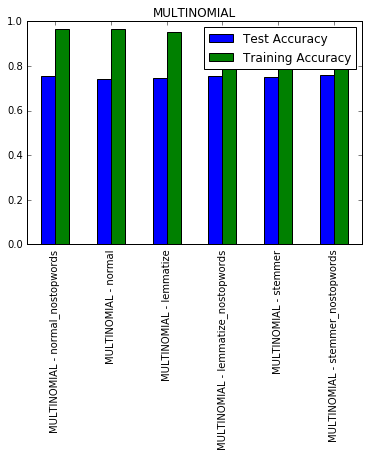

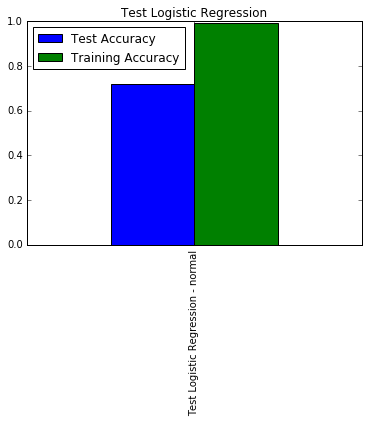

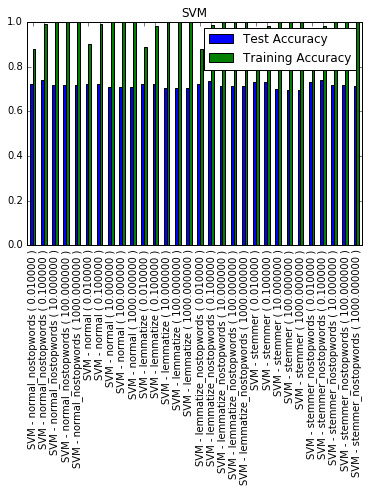

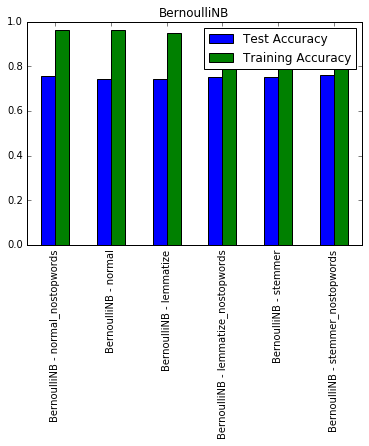

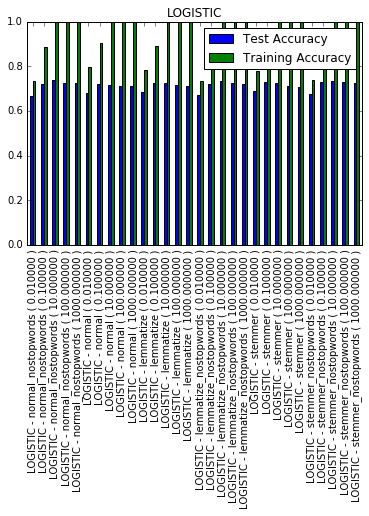

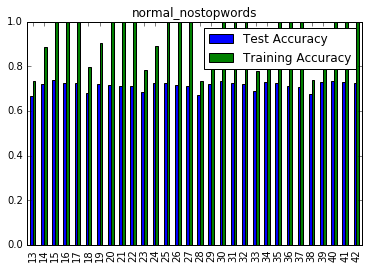

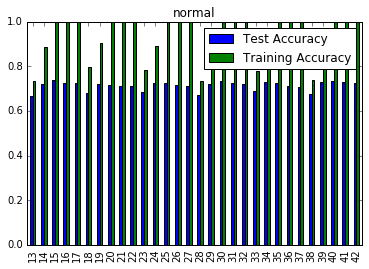

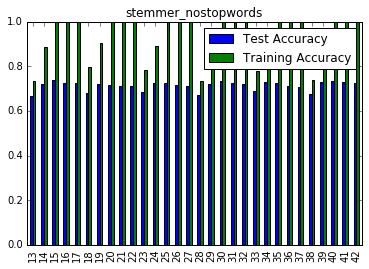

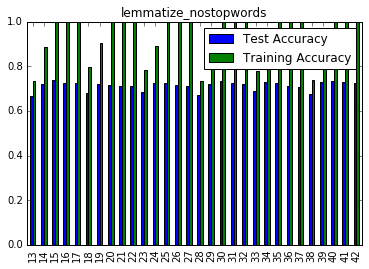

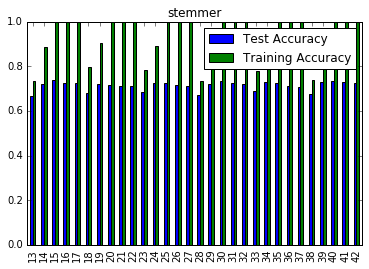

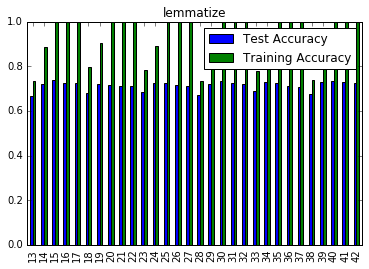

In [33]:
df["Show name"] = df.apply(lambda row: "%s - %s" % (row["Name"], row["extractor"])
                           + (" ( %f )" % row["C"] if not pd.isnull(row["C"]) else ""),
                           axis=1)

for model_name in set(list(df["Name"])):
    ax = df[df["Name"] == model_name][["Show name", "Test Accuracy", "Training Accuracy"]].plot.bar(title=model_name)
    ax.set_xticklabels(df[df["Name"] == model_name]["Show name"])

for extractor_name in set(list(df["extractor"])):
    df[df["Name"] == model_name][["Show name", "Test Accuracy", "Training Accuracy"]].plot.bar(title=extractor_name)